In [1]:
import numpy as np
import tensorflow as tf
import sys
np.random.seed(1)

/Users/sachingupta/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28)/255, y_train[0:1000])
one_hot_labels = np.zeros((len(labels),10))

for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test), 28*28)/255
test_labels = np.zeros((len(y_test),10))

for i,l in enumerate(y_test):
    test_labels[i][l] = 1
    
def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1-(output**2)

def softmax(x):
    temp = np.exp(x)
    return temp/np.sum(temp, axis=1, keepdims=True)

alpha, iterations, hidden_size = (2, 300, 100)
pixels_per_image, num_labels = (784, 10)
batch_size = 100
    
weights_0_1 = 0.02*np.random.random((pixels_per_image, hidden_size))-0.01
weights_1_2 = 0.2*np.random.random((hidden_size, num_labels))-0.1
    
for j in range(iterations):
    correct_cnt = 0
    for i in range(int(len(images)/batch_size)):
        batch_start, batch_end = ((i*batch_size), ((i+1)*batch_size))
        layer_0 = images[batch_start:batch_end]
        layer_1 = tanh(np.dot(layer_0, weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1, weights_1_2))
        
        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == \
                                  np.argmax(labels[batch_start+k:batch_start+k+1]))
        layer_2_delta = (labels[batch_start:batch_end]-layer_2)/(batch_size * layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)*tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask
        
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
    test_correct_cnt = 0 
        
    for i in range(len(test_images)):
        layer_0 = test_images[i:i+1]
        layer_1 = tanh(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
            
    if(j % 10 == 0):
        sys.stdout.write("\n" + "I:" + str(j) + \
                             " Test-Acc:" + str(test_correct_cnt/float(len(test_images))) + \
                            " Train-Acc:" + str(correct_cnt/float(len(images))))

Using TensorFlow backend.



I:0 Test-Acc:0.4562 Train-Acc:0.195
I:10 Test-Acc:0.5885 Train-Acc:0.603
I:20 Test-Acc:0.6319 Train-Acc:0.635
I:30 Test-Acc:0.6586 Train-Acc:0.671
I:40 Test-Acc:0.6738 Train-Acc:0.706
I:50 Test-Acc:0.6836 Train-Acc:0.714
I:60 Test-Acc:0.6973 Train-Acc:0.736
I:70 Test-Acc:0.7161 Train-Acc:0.754
I:80 Test-Acc:0.7318 Train-Acc:0.771
I:90 Test-Acc:0.7417 Train-Acc:0.788
I:100 Test-Acc:0.7507 Train-Acc:0.802
I:110 Test-Acc:0.7574 Train-Acc:0.804
I:120 Test-Acc:0.7612 Train-Acc:0.811
I:130 Test-Acc:0.7663 Train-Acc:0.819
I:140 Test-Acc:0.7712 Train-Acc:0.826
I:150 Test-Acc:0.7748 Train-Acc:0.817
I:160 Test-Acc:0.7776 Train-Acc:0.834
I:170 Test-Acc:0.7795 Train-Acc:0.836
I:180 Test-Acc:0.7809 Train-Acc:0.843
I:190 Test-Acc:0.7827 Train-Acc:0.861
I:200 Test-Acc:0.7838 Train-Acc:0.862
I:210 Test-Acc:0.7848 Train-Acc:0.859
I:220 Test-Acc:0.7871 Train-Acc:0.867
I:230 Test-Acc:0.7885 Train-Acc:0.871
I:240 Test-Acc:0.7892 Train-Acc:0.88
I:250 Test-Acc:0.7904 Train-Acc:0.861
I:260 Test-Acc:0.7905 T

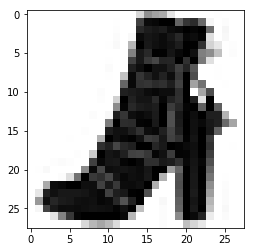

In [5]:
import matplotlib.pyplot as plt

plt.imshow(np.reshape(images[11],(28,28)),cmap='gray_r')
plt.show()

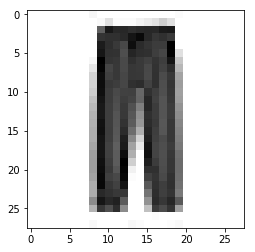

In [4]:
plt.imshow(np.reshape(images[21],(28,28)),cmap='gray_r')
plt.show()